# Time-local Master equation

## Wigner function

1.0
0.002002002002002002


C:\Users\niki\Anaconda3-32\lib\site-packages\ipykernel\__main__.py:59: ComplexWarning: Casting complex values to real discards the imaginary part


R= 1.0
v= (0.00241761444296-8.84102508e-10j)
expv= 5.84485959481e-06


<IPython.core.display.Javascript object>


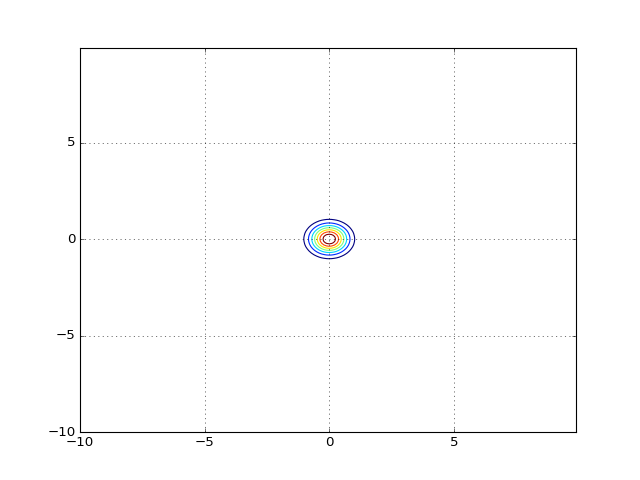

<IPython.core.display.Javascript object>


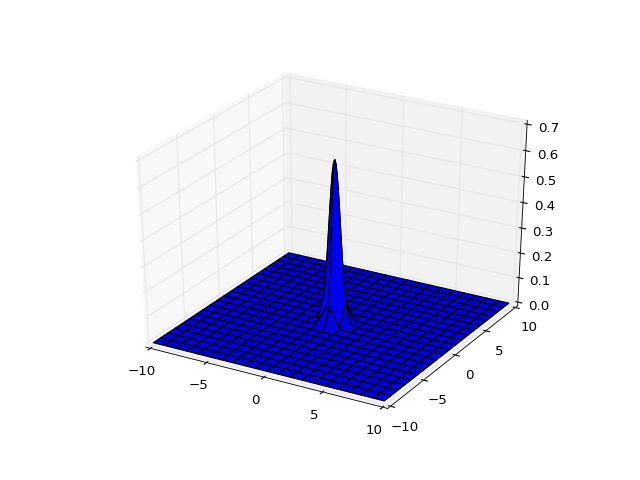

<IPython.core.display.Javascript object>


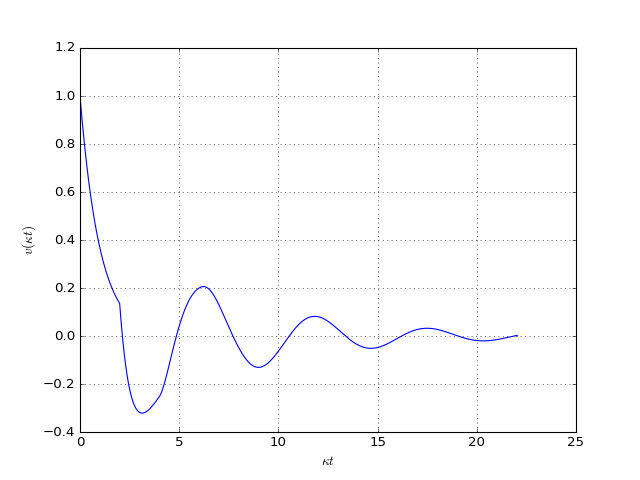

<IPython.core.display.Javascript object>


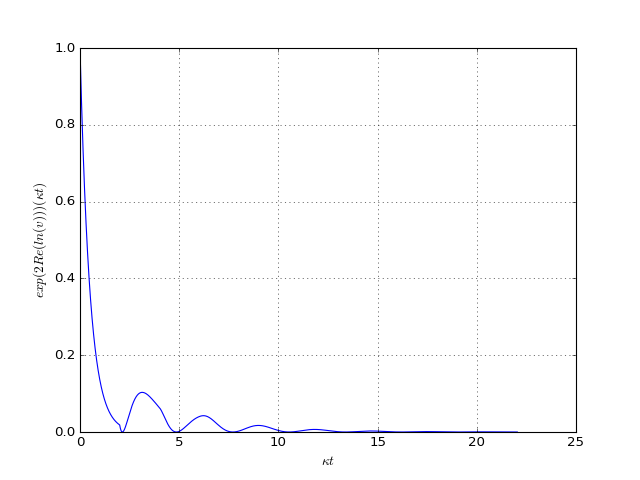

In [1]:
%matplotlib nbagg
from pylab import *
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

#Parameters:
rb    = 0.5
L     = 0.
k     = 2*sqrt(rb*(1-rb)*(1-L))
print(k)
eps   = 1
delta = 0. 
ktau  = 2.
phi   = 0
theta = 0

lamb_s  = 860e-9
c       = 3e8
om_s    = 2*pi*c/lamb_s
rt_len  = 500e-3
T1      = 0.123
kappa   = 0.5*T1/rt_len*c
om_c    = om_s+delta*kappa

eps_omc = eps/om_c*kappa
N       = 1000
time    = 10
kt_step = ktau/(N-1)
print(kt_step)

vend = 0
x = arange(-10.,10.,0.1)
y = arange(-10.,10.,0.1)
x,y = meshgrid(x,y)
num = (time+1)*(N+1)
vf = zeros(num)
expvf = zeros(num)

# Calculating v
for n in range(time+1):
    #print("n=",n)
    for i in range(N+1):
        kt = (n*N+i)*kt_step
        v0 = exp(-(1j*(delta-eps_omc*eps)+1)*kt)
        #print("v0=",v0)
        v_term = 0
        for m in range(n+1):
            fact   = 1/math.factorial(m)
            v_term = v_term + fact*(-k*exp(1j*phi+\
                    (1j*(delta-eps_omc*eps)+1)*ktau)*\
                    (kt-m*ktau))**m
            #print("v_term=",v_term)
        v    = v0*v_term
        #print(v)
        expv = exp(2*real(log(v)))
        R    = 1 + eps_omc**2 * expv * (1.-expv)
        
        vf[n*N+i]    = v
        expvf[n*N+i] = expv
print("R=",R)        
print("v=",v)
print("expv=",expv)
W1       = expv*(x**2+y**2)
CW2      = (1-expv)*(1+eps_omc**2/2)
W2       = (1-eps_omc*sin(theta))*x**2 + \
2*eps_omc*cos(theta)*x*y + (1+eps_omc*sin(theta))*y**2
W = 2./pi*sqrt(1./R)*exp(-2./R * (W1 + CW2*W2))

#Plot
fig0 = plt.figure()
ax0 = fig0.gca()
ax0.contour(x, y, W)
ax0.grid(True)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, W)
fig2= plt.figure()
ax2 =fig2.gca()
ax2.plot(arange(0,num,1)*kt_step,vf)
ax2.set_xlabel("$\kappa t$")
ax2.set_ylabel("$v(\kappa t)$")
ax2.grid(True)
fig3= plt.figure()
ax3 =fig3.gca()
ax3.plot(arange(0,num,1)*kt_step,expvf)
ax3.set_xlabel("$\kappa t$")
ax3.set_ylabel("$exp(2Re(ln(v)))(\kappa t)$")
ax3.grid(True)
plt.show()

In [21]:
log(0)

C:\Users\niki\Anaconda3-32\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


-inf

<IPython.core.display.Javascript object>


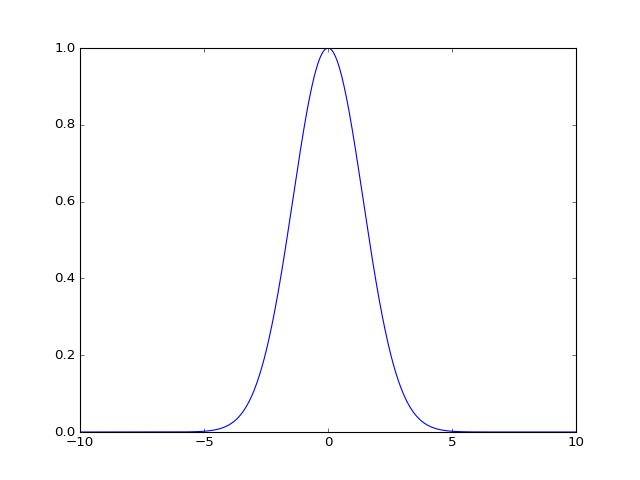

In [83]:
%matplotlib nbagg
t=linspace(-10,10,1000)
func=exp(-t**2/4)
plot(t,func)
plt.show()